In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

VISUALIZAR  A BASE DE DADOS

In [5]:
df = pd.read_csv('acidentes_sp_clean.csv')
df.head() #EXIBINDO AS 5 PRIMEIRAS LINHAS

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Tempo entre o Acidente e o óbito,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido
0,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,CONDUTOR,VIA,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,45-49,48.0,ONIBUS
1,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,PASSAGEIRO,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,35-39,36.0,ONIBUS
2,110429,3887,2020,2020-04-30,2020-04-17,Rodovias,30,4,ABRIL,2020,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,CHOQUE,DEFENSA / BARREIRA,Até 30 dias,MASCULINO,25-29,26.0,NÃO HÁ
3,30309,1745,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,Mesmo dia,MASCULINO,NAO DISPONIVEL,NaN,AUTOMOVEL
4,70923,1373,2020,2020-04-30,2020-04-30,Vias Municipais,30,4,ABRIL,2020,...,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,Mesmo dia,FEMININO,30-34,30.0,NÃO HÁ


In [8]:
#VERIFICAR O NUMERO DE LINHAS E COLUNAS
df.shape

(30571, 34)

In [11]:
#VERIFICAR AS INFORMAÇÕES DOS DADOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30571 entries, 0 to 30570
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             30571 non-null  int64  
 1   Número do Bo (RDO)                30571 non-null  int64  
 2   Ano do BO (RDO)                   30571 non-null  int64  
 3   Data do Óbito                     30571 non-null  object 
 4   Data do Acidente                  30571 non-null  object 
 5   Tipo de via                       30571 non-null  object 
 6   Dia do óbito                      30571 non-null  int64  
 7   Mês do Óbito                      30571 non-null  int64  
 8   Mês Óbito Descrição               30571 non-null  object 
 9   Ano do Óbito                      30571 non-null  int64  
 10  Ano/Mês do Óbito                  30571 non-null  float64
 11  Dia da Semana                     30571 non-null  object 
 12  Hora

In [12]:
#Cores
cores_hora = ['#FFD700','#FFD700','#8B0000','#FFD700','#C0C0C0']
cores_dia = ['#8B0000','#FFD700','#FFD700','#FFD700','#FFD700','#FFA500','#8B0000']
cores_genero = ['#87CEFA','#FF69B4']
cores_tipo_vitima = ["#9b59b6", "#e74c3c", "#2ecc71"]

#Paletas
paleta_tipo_veiculo = sns.color_palette("husl", 7)
paleta_degrade=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.75, reverse=True)
paleta_hora = sns.color_palette(cores_hora)
paleta_tipo_vitima = sns.color_palette(cores_tipo_vitima)
paleta_genero = sns.color_palette(cores_genero)
paleta_dia = sns.color_palette(cores_dia)

In [16]:
#REMOVER OS DADOS ONDE APARECE "NÃO DISPONIVEL"
df_remove_genero = df.loc[(df['Sexo'] == 'NÃO DISPONIVEL')] #LOCALIZANDO NA TABELA
df = df.drop(df_remove_genero.index) #DROPANDO DA TABELA

sexo = df['Sexo'].value_counts() #FAZENOD A CONTAGEM DOS SEXOS PRESENTES
sexo['MASCULINO'] + sexo['FEMININO']
homens = sexo['MASCULINO']
mulheres = sexo['FEMININO']

In [18]:
#VERIFICANDO A PORCENTAGEM DE CADA SEXO
masc_porc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
femi_porc = sexo['FEMININO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100

print('Porcentagem de Homens: {} ({:.2f}%)'.format(homens, masc_porc))
print('Porcentagem Mulheres: {} ({:.2f}%)'.format(mulheres, femi_porc))

Porcentagem de Homens: 24532 (81.60%)
Porcentagem Mulheres: 5530 (18.40%)


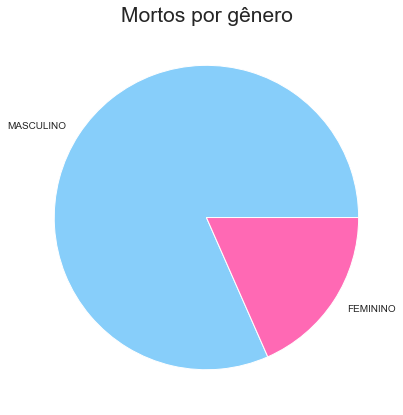

In [19]:
#VERIFICANDO A TAXA DE MORTES POR SEXO
fig = plt.figure(figsize=(7, 7))
sns.set_style('ticks')
sexo = df['Sexo'].value_counts()
sexo_num = [sexo[0], sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO', 'FEMININO'], colors=paleta_genero)
plt.title('Mortos por gênero', fontsize=21);

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição de idades por gênero')

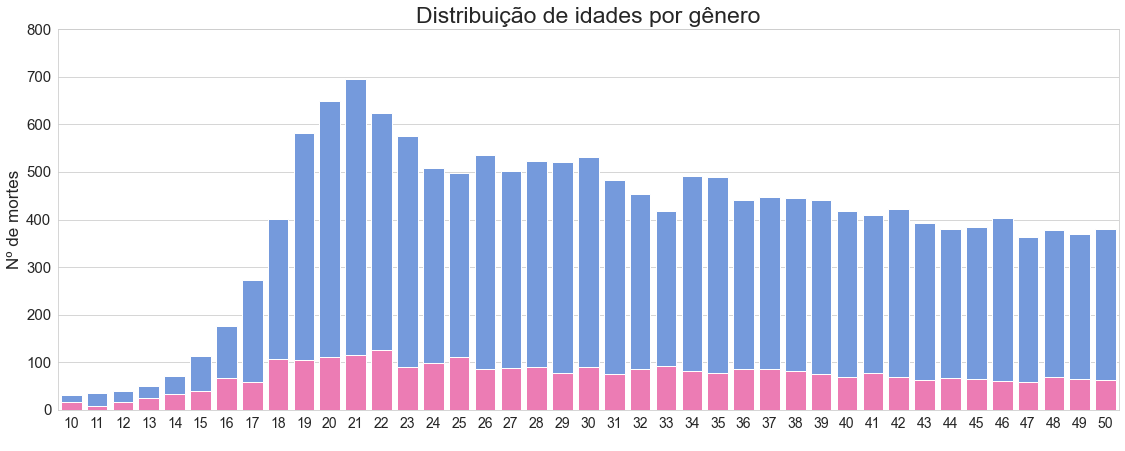

In [20]:
#VERIFICANDO A IDADE DOS GÊNEROS
fig = plt.figure(figsize=(19, 7))
sns.set_style('whitegrid')
df['idade_homem'] = df[df['Sexo'] == 'MASCULINO']['Idade da vítima'] #IDADE DAS VITIMAS DO SEXO MASCULINO
df['idade_homem'] = df['idade_homem'].values.astype(int) #CONVERTENDO AS IDADES PARA INTEIRO
df['idade_mulher'] = df[df['Sexo'] == 'FEMININO']['Idade da vítima'] #IDADE DAS VITIMAS DO SEXO FEMININO
df['idade_mulher'] = df['idade_mulher'].values.astype(int) #CONVERTENDO PARA INTEIRO

sns.countplot('idade_homem', color='#6495ED', data=df)
sns.countplot('idade_mulher', color='#FF69B4', data=df)
plt.xlim(10.5, 51.5)
plt.xlabel(' ')
plt.ylabel('Nº de mortes', fontsize=17)
plt.ylim(0, 800)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.title('Distribuição de idades por gênero', fontsize=23)

In [21]:
df_remove_vitima = df.loc[(df['Tipo de vítima'] == 'NÃO DISPONIVEL')]
df = df.drop(df_remove_vitima.index)

df['Tipo de vítima'].value_counts()/df['Tipo de vítima'] .value_counts().sum()*100

CONDUTOR          53.334860
PEDESTRE          26.754113
PASSAGEIRO        12.184750
NAO DISPONIVEL     7.726277
Name: Tipo de vítima, dtype: float64

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


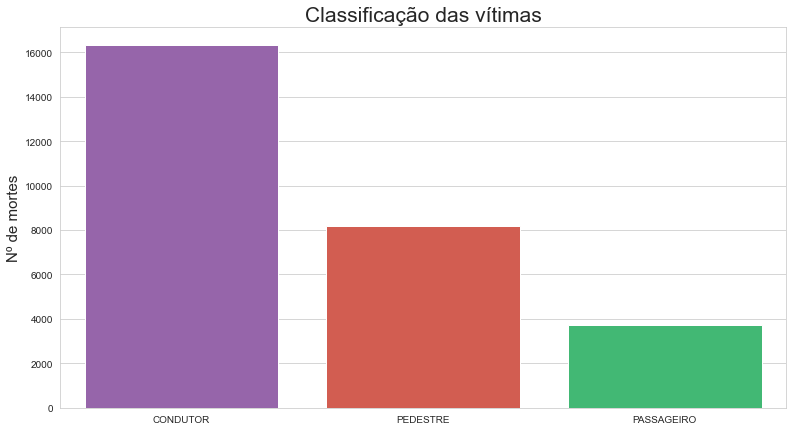

In [23]:
#GRÁFICO MOSTRANDO A CLASSIFICAÇÃO DAS VITIMAS
fig = plt.figure(figsize=(13, 7))
y = df['Tipo de vítima'].count()

sns.countplot('Tipo de vítima', 
              order=['CONDUTOR', 'PEDESTRE', 'PASSAGEIRO', 'NÃO DISPONIVEL'], 
              palette=paleta_tipo_vitima, 
              data=df)

plt.xlim(-0.5, 2.5)
plt.title('Classificação das vítimas', fontsize=21)
plt.xlabel(' ')
plt.ylabel('Nº de mortes', fontsize=15);

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


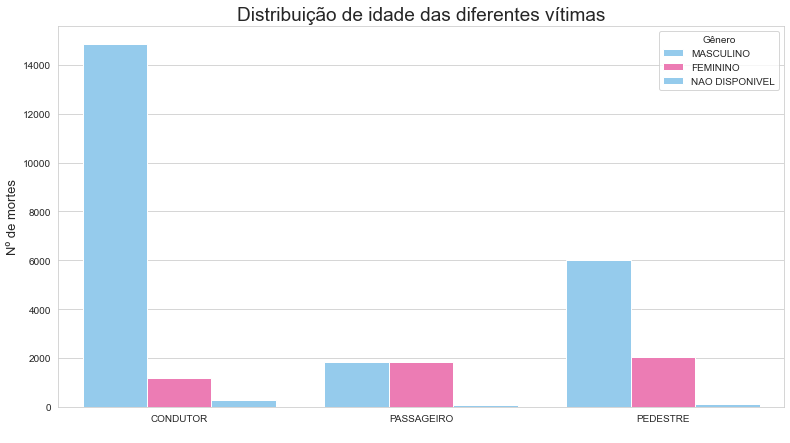

In [24]:
fig = plt.figure(figsize=(13, 7))
sns.countplot('Tipo de vítima', hue='Sexo', palette=paleta_genero, data=df)
plt.xlabel(' ')
plt.xlim(-0.5, 2.5)
plt.legend(title='Gênero')
plt.ylabel('Nº de mortes', fontsize=13)
plt.title('Distribuição de idade das diferentes vítimas', fontsize=19);

Text(0, 0.5, 'idade da vítima')

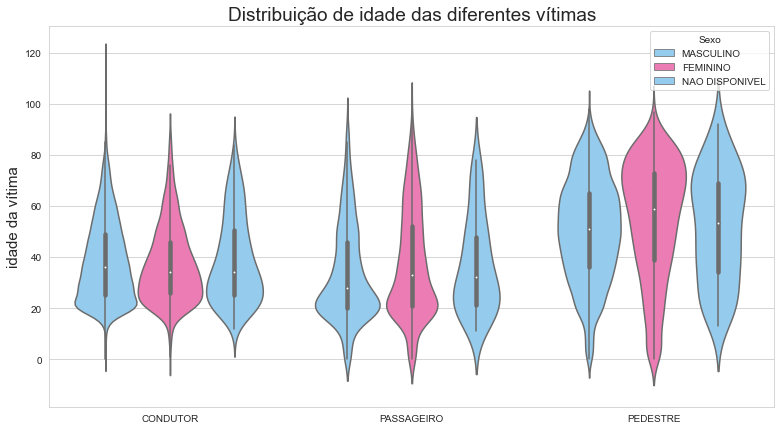

In [26]:
fig = plt.figure(figsize=(13, 7))
sns.violinplot(x='Tipo de vítima', y='Idade da vítima', hue='Sexo', palette=paleta_genero, data=df)
plt.xlim(-0.5, 2.5)
plt.title('Distribuição de idade das diferentes vítimas', fontsize=19)
plt.xlabel(' ')
plt.ylabel('idade da vítima', fontsize=15)

VEICULO DA VITIMA

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


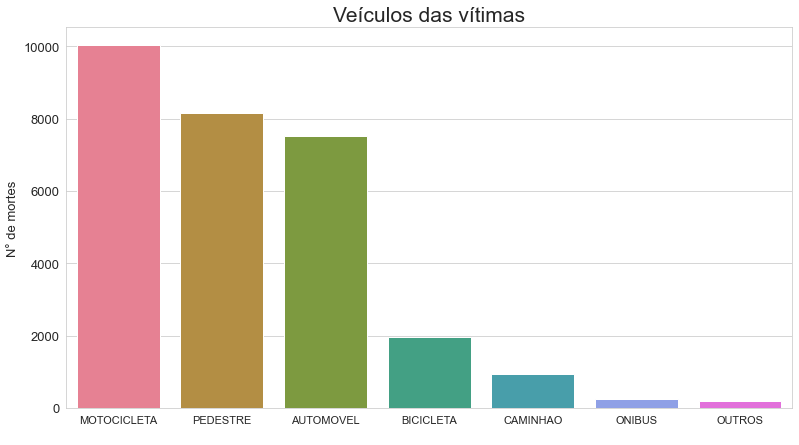

In [29]:
df_remove_veiculo = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_veiculo.index)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))

sns.countplot('Tipo do veículo da vítima',
              order = df['Tipo do veículo da vítima'].value_counts().index,
              palette=paleta_tipo_veiculo,
              data=df)

plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Veículos das vítimas',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('N° de mortes',fontsize=13)
fig.savefig('Acidente_SP_veiculos.png');

In [30]:
tipo_porc = df['Tipo do veículo da vítima'].value_counts()/(df['Tipo do veículo da vítima'].value_counts().sum())*100
tipo_porc

MOTOCICLETA    34.522416
PEDESTRE       28.107568
AUTOMOVEL      25.886647
BICICLETA       6.745403
CAMINHAO        3.219475
ONIBUS          0.878039
OUTROS          0.640452
Name: Tipo do veículo da vítima, dtype: float64

IDADE DA VITIMA X VEICULO E GENERO

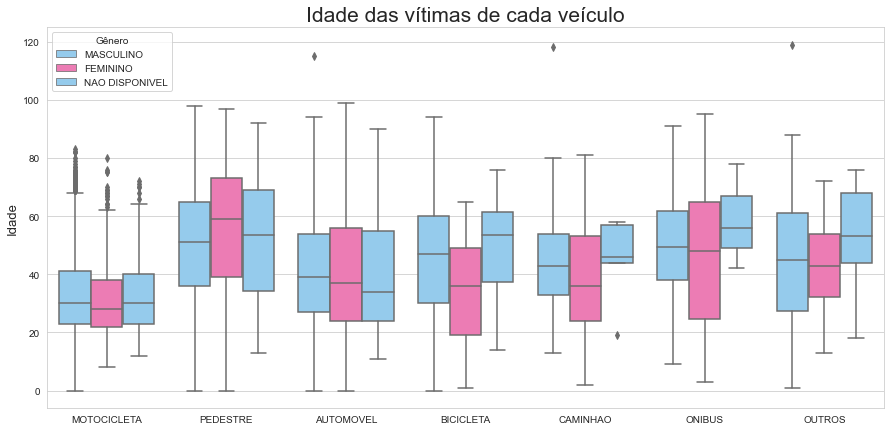

In [32]:
fig = plt.figure(figsize=(15, 7))

sns.boxplot(x='Tipo do veículo da vítima', 
            y='Idade da vítima', 
            hue='Sexo',
            palette=paleta_genero, 
            order=df['Tipo do veículo da vítima'].value_counts().index, 
            data=df)

plt.title('Idade das vítimas de cada veículo', fontsize=21)
plt.xlabel(' ')
plt.ylabel('Idade', fontsize=13)
plt.legend(title='Gênero');

ONDE ACONTECE ESSES ACIDENTES

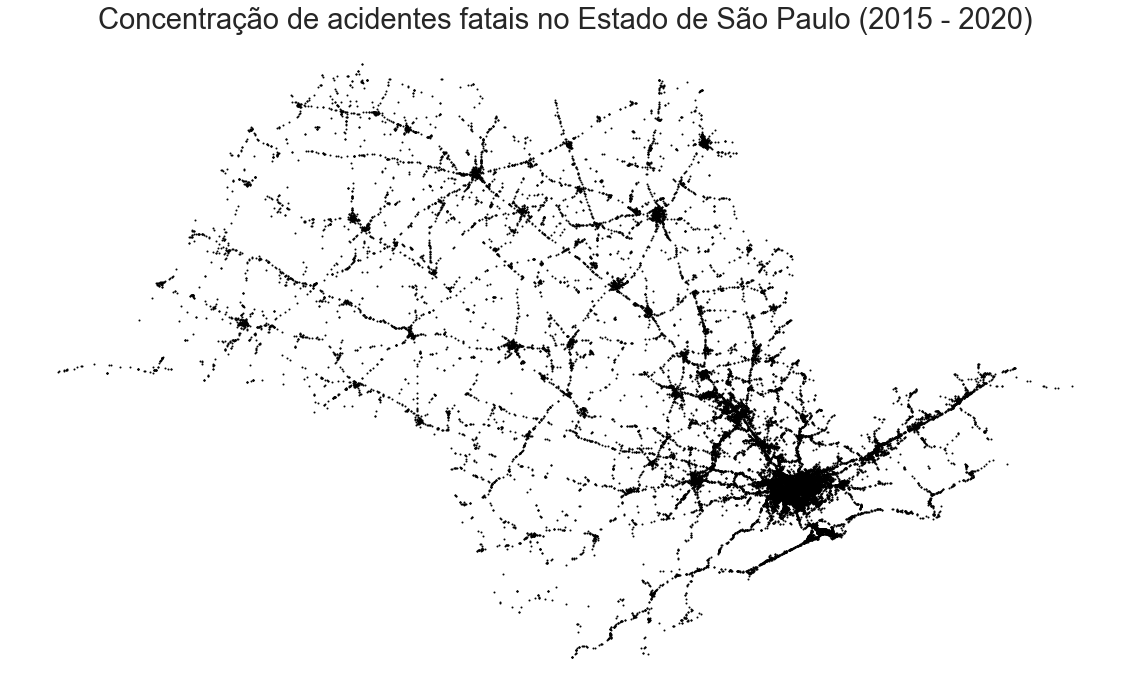

In [34]:
fig = plt.figure(figsize=(20, 12))
plt.scatter(df['LONG_(GEO)'], df['LAT_(GEO)'], s=1, c='black')
plt.title('Concentração de acidentes fatais no Estado de São Paulo (2015 - 2020)', fontsize=29)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
sns.despine(left=True, bottom=True, right=True, top=True);

In [37]:
Municipio_com_mais = df['Município'].value_counts().head(5)
df['Município'].value_counts()/ df['Município'].value_counts().sum()*100

SAO PAULO                 16.610426
CAMPINAS                   2.641003
GUARULHOS                  2.406859
SOROCABA                   1.621789
RIBEIRAO PRETO             1.490944
                            ...    
OURO VERDE                 0.003443
SAO JOAO DO PAU D ALHO     0.003443
ALVARO DE CARVALHO         0.003443
LOURDES                    0.003443
MURUTINGA DO SUL           0.003443
Name: Município, Length: 635, dtype: float64

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


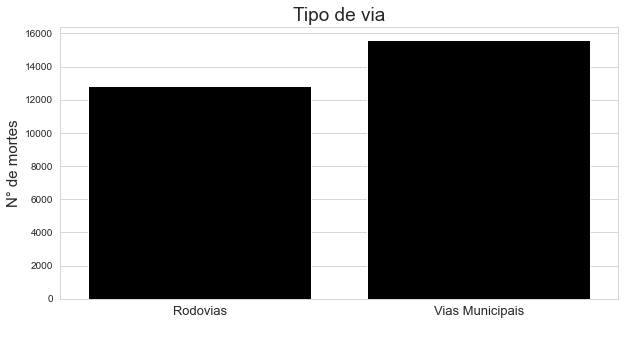

In [38]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Tipo de via',color='black',data=df)
plt.title('Tipo de via',fontsize=19)
plt.ylabel('N° de mortes',fontsize=15)
plt.xlabel(' ')
plt.xlim(-0.5,1.5)
plt.xticks(fontsize=13);

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


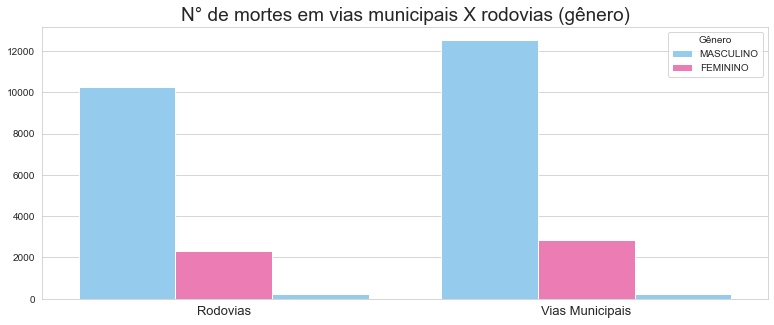

In [39]:
fig = plt.figure(figsize=(13,5))
sns.countplot('Tipo de via',hue='Sexo',palette=paleta_genero,data=df)
plt.xlim(-0.5,1.5)
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (gênero)',fontsize=19)
plt.legend(title='Gênero', loc='upper right', labels=['MASCULINO', 'FEMININO']);

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


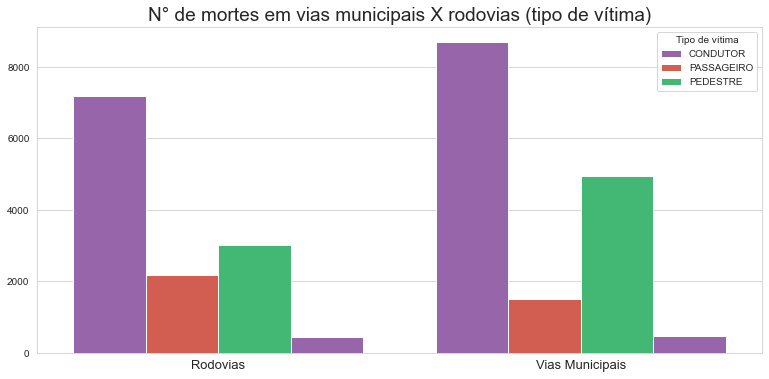

In [40]:
fig = plt.figure(figsize=(13,6))
sns.countplot('Tipo de via',hue='Tipo de vítima',palette=paleta_tipo_vitima,data=df)
plt.xlim(-0.5,1.5)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (tipo de vítima)',fontsize=19)
plt.legend(title='Tipo de vítima', loc='upper right', labels=['CONDUTOR', 'PASSAGEIRO','PEDESTRE']);

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


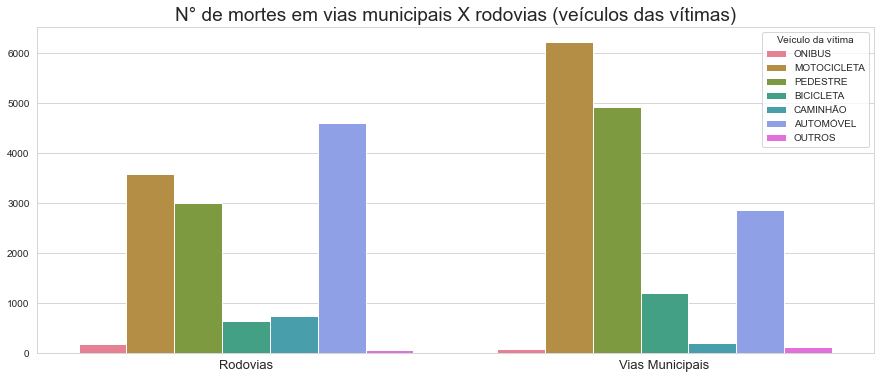

In [41]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Tipo de via',hue='Tipo do veículo da vítima',palette=paleta_tipo_veiculo,data=df)
plt.xlim(-0.5,1.5)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (veículos das vítimas)',fontsize=19)
plt.legend(title='Veículo da vítima', 
           loc='upper right', 
           labels=['ONIBUS', 'MOTOCICLETA','PEDESTRE','BICICLETA','CAMINHÃO','AUTOMÓVEL','OUTROS']);

In [42]:
df['Mês do Óbito'].value_counts()

3     2735
4     2606
12    2481
1     2471
7     2471
5     2438
6     2398
8     2354
10    2346
2     2344
9     2301
11    2097
Name: Mês do Óbito, dtype: int64

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


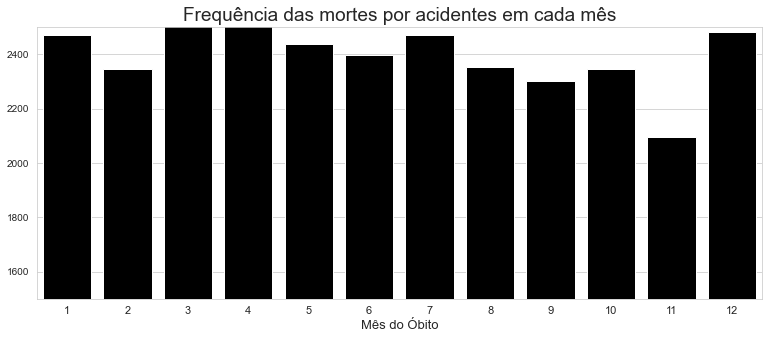

In [43]:
#Agora interpretando no gráfico
fig = plt.figure(figsize=(13,5))
plt.title('Frequência das mortes por acidentes em cada mês',fontsize=19)
sns.countplot('Mês do Óbito',color='black',data=df)
plt.ylim(1500,2500)
plt.ylabel('')
plt.xlabel('Mês do Óbito',fontsize=13)
plt.xticks(fontsize=11);

In [44]:
#Porcentagem de morte por turno e dia da semana
df['Turno'].value_counts()/df['Turno'].value_counts().sum()*100

NOITE             34.105778
TARDE             21.551546
MADRUGADA         19.430480
MANHA             17.519455
NAO DISPONIVEL     7.392742
Name: Turno, dtype: float64

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


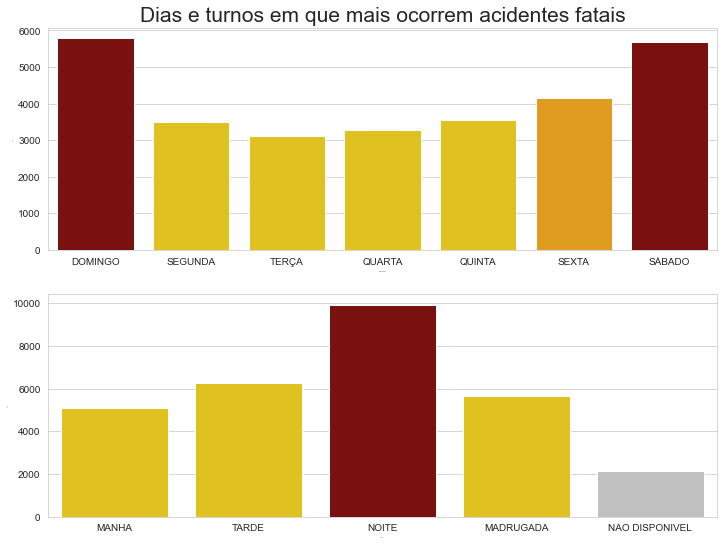

In [45]:
fig = plt.figure(figsize=(12,9))
plt.subplot(2,1,2)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
turnos = df['Turno'].value_counts()
sns.countplot('Turno',order=['MANHA','TARDE','NOITE','MADRUGADA','NAO DISPONIVEL'],palette=cores_hora,data=df)
plt.subplot(2,1,1)
plt.title('Dias e turnos em que mais ocorrem acidentes fatais',fontsize=21)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
sns.countplot('Dia da Semana',order=['DOMINGO','SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO'],palette=cores_dia,data=df);

In [46]:
#Tempo entre acidente e o óbito
df['Tempo entre o Acidente e o óbito'].value_counts()/df['Tempo entre o Acidente e o óbito'].value_counts().sum()*100

Mesmo dia          80.338820
Até 7 dias          6.542249
Até 30 dias         5.192480
Dia anterior        4.207699
Mais de 30 dias     3.718752
Name: Tempo entre o Acidente e o óbito, dtype: float64

COMO ACONTECE

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


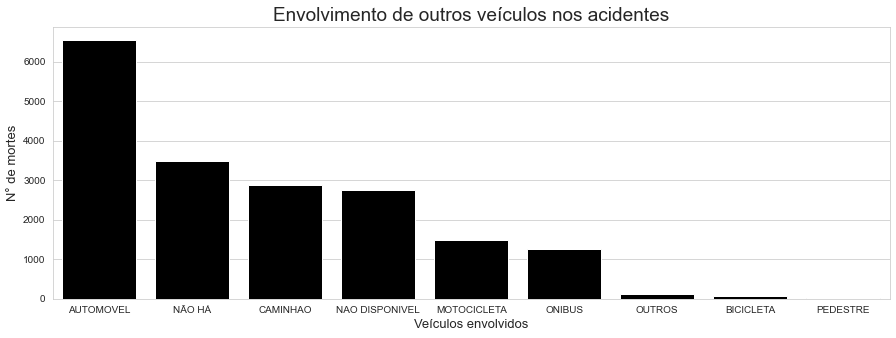

In [47]:
fig = plt.figure(figsize=(15,5))
sns.countplot('Outro Veículo Envolvido',order=df['Outro Veículo Envolvido'].value_counts().index,color='black',data=df)
plt.ylabel('')
plt.xlabel('Veículos envolvidos',fontsize=13)
plt.ylabel('N° de mortes',fontsize=13)
plt.title('Envolvimento de outros veículos nos acidentes',fontsize=19);

In [48]:
#Porcentagem de cada veículo envolvido
df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100

AUTOMOVEL         35.134120
NÃO HÁ            18.680258
CAMINHAO          15.445279
NAO DISPONIVEL    14.790773
MOTOCICLETA        7.993562
ONIBUS             6.695279
OUTROS             0.659871
BICICLETA          0.439914
PEDESTRE           0.160944
Name: Outro Veículo Envolvido, dtype: float64

In [49]:
#Quando há acidente, qual a porcentagem?
df_remove_envolvido = df.loc[(df['Outro Veículo Envolvido'] == 'NÃO HÁ')]
df = df.drop(df_remove_envolvido.index)
df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100

AUTOMOVEL         43.204908
CAMINHAO          18.993271
NAO DISPONIVEL    18.188415
MOTOCICLETA        9.829793
ONIBUS             8.233276
OUTROS             0.811453
BICICLETA          0.540968
PEDESTRE           0.197915
Name: Outro Veículo Envolvido, dtype: float64

In [50]:
df_remove_acidente = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_acidente.index)

# Porcentagem do tipo de aciednte
df['Tipo de acidente'].value_counts()/df['Tipo de acidente'].value_counts().sum()*100

COLISAO          45.951681
ATROPELAMENTO    33.753673
CHOQUE           10.186092
OUTROS           10.108554
Name: Tipo de acidente, dtype: float64

C:\Users\breno\anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


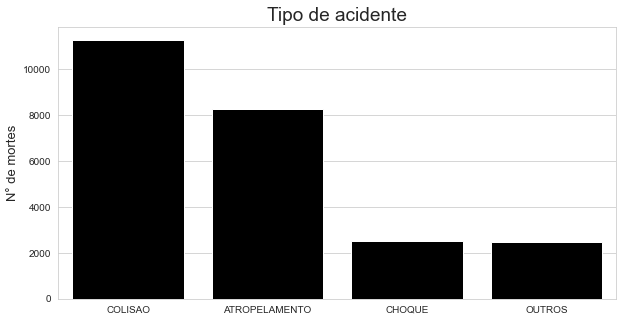

In [51]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Tipo de acidente',order=df['Tipo de acidente'].value_counts().index,color='black',data=df)
plt.ylabel('N° de mortes',fontsize=13)
plt.xlabel('')
plt.title('Tipo de acidente',fontsize=19);

In [52]:
df_remove_sub_acidente = df.loc[(df['Sub Tipo do Acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)
df['Sub Tipo do Acidente'].value_counts()/df['Sub Tipo do Acidente'].value_counts().sum()*100

FRONTAL                                  22.417024
CRUZANDO A VIA                           21.225910
TRASEIRA                                 14.320128
LATERAL                                  12.071734
TRANSVERSAL                               8.391328
ANDANDO NA VIA / ACOSTAMENTO              4.978587
TOMBAMENTO VEÍCULO DE 2 RODAS             3.198608
VEÍCULO ESTACIONADO                       2.917559
CONDUTOR/PASSAGEIROS FORA DO VEÍCULO      2.141328
NA CALÇADA                                1.713062
ENGAVETAMENTO                             1.084047
CAPOTAMENTO                               0.950214
POSTE                                     0.776231
DEFENSA / BARREIRA                        0.736081
OUTROS                                    0.695931
ANIMAL                                    0.521949
MURO/PAREDE/TALUDE                        0.495182
TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS     0.388116
ÁRVORE                                    0.254283
QUEDA (ÁGUA, BARRANCO, PONTE)  